# Session 8. Clustering
## K-means clustering

What if we want to find patterns in the data but do not have any labels to provide the "correct" patterns? Unsupervised approach - k-means clustering - can help learning the most suitable cluster structure given a suggested number of clusters $k$. 

In short the objective of the clustering is grouping the given set of objects by similarity of their characteristics (such as point coordinates). It aims for the similarity of objects within each cluster to be generally higher than the similarity between the objects that belong to the different clusters. Or in other words objects within each cluster are generally more similar than objects from different clusters.

Consider the data samples ($N$ points) in $n$-dimensional Euclidean space: 
$$
X=\{x_i, i=1..N\}=\{x_i^j, i=1..N, j=1..n\},
$$ 
where $x_i$ are the $n$-dimensional raw-vectors corresponding to each of the $N$ sample points. The approach is trying to infer cluster indexes $c_i$ (taking one of the possible values $1,2,...,k$) for each point $x_i$ in such a way that the cumulative squared distance from all the sample points $x_i$ to the centroids $\mu_{c_i}$ of the corresponding clusters $c_i$ is minimized. This is quite an intuitive criteria, meaning that the clusters are as compact as possible for the given number $k$.

The cluster centroids are defined as simple vector means
$$
\mu_c=\sum_{i, c(i)=c} x_i/m(c),
$$
where
$$
m(c)=|\{i, c(i)=c\}|
$$
denotes the cluster size. Or in the coordinate form $\mu_c=(\mu_c^j, j=1..n)$
$$
\mu_c^j=\frac{\sum_{i, c(i)=c} x_i^j}{m(c)}, j=1..n.
$$
It can be shown that centroids selected that way mimize the cumulatize squared distance
$$
SD=\sum_i \|x_i-\mu_{c(i)}\|^2=\sum_{i,j} \left(x_i^j-\mu_{c(i)}^j\right)^2\to \min
$$
given the cluster attachments, since 
$$
0=\frac{\partial SD}{\partial \mu_c^j}=2\sum_{i,c(i)=c} \left(x_i^j-\mu_{c}^j\right)\Rightarrow m(c)\mu_c^j=\sum_{i,c(i)=c} x_i^j
$$

Then the objective of the clustering is to find the cluster attachments $c(i)$ that would further minimize the $SD$.

Alternatively one can think of the coordinates $x_i^j$ of the points $i$ within each cluster $c(i)=c$ to be generated using independent normal distributions $x_i^j\sim N(\mu_{c}^j,\sigma^2)$ with the same fixed variance and the means depending on the cluster the point belongs to. Then maximizing the joint likelihood of all the observed coordinates $x_i^j$ is equivalent to minimizing $SD$ as per above.

Indeed the joint likelihood of all the observed points would then be defined as
$$
L = \prod_{i,j} \frac{1}{\sqrt{2\pi}\sigma}e^\frac{-(x_i^j - \mu_c^j)^2}{2\sigma^2}
$$
and the logarithm of the likelihood
$$
\ln L = -nN\left(0.5 \ln (2\pi)+\ln\sigma\right)-\frac{1}{2\sigma^2}\sum_{i,j}(x_i^j - \mu_c^j)^2=-nN\left(0.5 \ln (2\pi)+\ln\sigma\right)-\frac{1}{2\sigma^2} SD
$$
As we assume a constant $\sigma$, maximizing $L$ or, equivalently, $\ln L$ comes down to minimizing $SD$. This actually serves as a probabistic explanation of using cumulative squared distance as an objective function - it comes from looking for the given number of distributions with the same variance (one per each cluster and coordinate) to best explain the observed data.

The common k-means algorithm (often also called after Lloyd) starts from a random cluster assignment and iterates the following two steps:

A. Compute cluster means.

B. Re-assign each point to the cluster with the mean closest to the considered point.

Alternative approach is to initially use $k$ random points of the sample as initial clusters means, starting from the step B.

The algorithm stops once a new iteration fails to alter any single cluster assignment.

Algorithm always converges to a local optimum of $SD$, however there is no guarantee that this partitioning is indeed the global optimum. Also the final outcome happens to depend on the initial partitioning. This way it makes sense to repreat $k$-means a number of times (like $10,25...100$ etc) with different random initial partitioning, picking up the partitioning with the best final $SD$. 

In order to figure out how many trials to consider one can keep adding them one by one tracking how do they affect the final score and stop once it stays stable for a while.

## Probabilistic framework - k-means as a particular case of Gaussian Mixture

Look for a set of $k$ multi-variate normal distributions to explain the data:
$$
x_i\sim {\cal N}(\mu_{c(i)},\Sigma_{c(i)})
$$
where $c(i)=1,2...k$ denotes one of the $k$ distirubtions to explain a particular data point $x_i$, $\mu_c$ is the mean vector and $\Sigma_c$ is a covariance matrix of the corresponding distribution. Effectively this would cluster the points $x_i$ by the specific distributions $c(i)$ used to explain each of them. Then the welness of fit of those distributions is represented by the max-likelihood criteria:
$$
L=\prod_i \frac{\exp\left(-\frac{1}{2}(x_i-\mu_{c(i)})^T\Sigma_{c(i)}^{-1}(x_i-\mu_{c(i)})\right)}{\sqrt{(2\pi)^n|\Sigma_{c(i)}|}}\to \max
$$


In a particular case of having the same diogonal covariance matrixes $\Sigma_{c(i)}=\sigma^2 I_n$ for each distribution, i.e. independent normal distributions explaining each coordinate of each point:
$$
x_i^j\sim {\cal N}(\mu_{c(i)}^j,\sigma^2)
$$
one can rewrite the max-likelihood criteria above in a logarithmic form as
$$
\log(L)=-\frac{1}{2\sigma^2}\sum_{i,j}(x_i^j-\mu_{c(i)}^j)^2-nN \log(\sqrt{2\pi}\sigma)\to\max.
$$
Then maximixing $\log(L)$ is equivalent to minimizing 
$$
SD=\sum_{i,j}(x_i^j-\mu_{c(i)}^j)^2\to\min.
$$
So $k$-means clustering objective follows from the above probabilistic framework in case of same diogonal covariance matrixes (i.e. independent normal distributions for the components $x^j$ with the same variance). 

A more general case not restricting the shape of the covariance matrixes is implemented within the Gaussian Mixture model. 

This also means that $k$-means is well suited and probabilistically motivated if no significant correlation is observed between the components and they are on the same scale. Otherwise Gaussian Mixture Model would be more appropriate. Alternatively, one could first standardize the data and remove the correlations (e.g. using Principal Component Analysis to be covered in ADS) and then apply k-means.

### Toy Example 1

In [1]:
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from matplotlib.pylab import plt
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

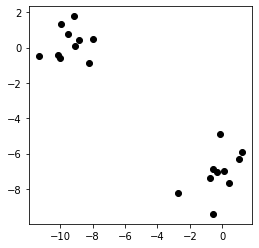

In [2]:
#generate artificual data for clustering
X, y = make_blobs(n_features=2, centers=2,n_samples=20,random_state=9)
plt.figure(figsize=(4,4))
plt.scatter(X[:,0],X[:,1],c="k")
plt.show()

#### Perform clustering by hand to illustrate the process for this simple example:

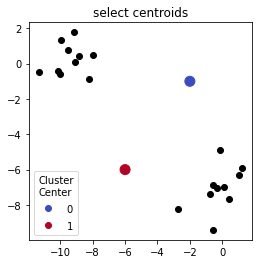

In [3]:
cent=np.asarray([[-6,-6],[-2,-1]])
plt.figure(figsize=(4,4))
y_t=np.sum((X-cent[0,:])**2,axis=1)**0.5<np.sum((X-cent[1,:])**2,axis=1)**0.5 #attach points to clustering based on centroid proximity
plt.title('select centroids')
sca = plt.scatter(X[:,0],X[:,1],c='k')
center = plt.scatter(cent[:,0],cent[:,1],c=[1,0],s=100,cmap=plt.cm.coolwarm)
legend1 = plt.legend(*center.legend_elements(),
                    loc="lower left", title="Cluster\nCenter")

Text(0.5, 1.0, 'Assign points to center')

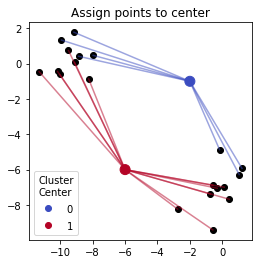

In [4]:
plt.figure(figsize=(4,4))
cmap = plt.get_cmap('coolwarm')
colors = cmap(np.linspace(0, 1.0, 2))
for ind in range(len(y_t)):
    if y_t[ind] == True:
        plt.plot([X[ind][0],cent[0][0]],[X[ind][1],cent[0][1]],c=colors[1], alpha=0.5)
    else:
        plt.plot([X[ind][0],cent[1][0]],[X[ind][1],cent[1][1]],c=colors[0], alpha=0.5)
plt.title('assign points')
plt.scatter(X[:,0],X[:,1],c='k')
center = plt.scatter(cent[:,0],cent[:,1],c=[1,0],s=100,cmap=plt.cm.coolwarm)
legend1 = plt.legend(*center.legend_elements(),
                    loc="lower left", title="Cluster\nCenter")
plt.title('Assign points to center')

Text(0.5, 1.0, 'Assign Results')

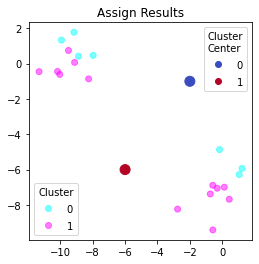

In [5]:
fig, ax = plt.subplots(figsize=(4,4))
# plt.title('assign points')

scatter = ax.scatter(X[:,0],X[:,1],c=y_t,cmap=plt.cm.cool,alpha=0.5)
center = ax.scatter(cent[:,0],cent[:,1],c=[1,0],s=100,cmap=plt.cm.coolwarm)

legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Cluster")
legend2 = ax.legend(*center.legend_elements(),
                    loc="upper right", title="Cluster\nCenter")
plt.gca().add_artist(legend1)
ax.set_title('Assign Results')

Text(0.5, 1.0, 'New Centers')

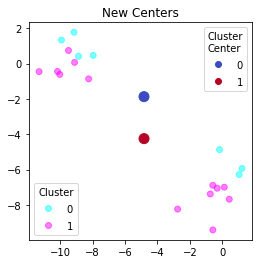

In [6]:
cent=np.asarray([[np.sum(X[:,0]*y_t)/(np.sum(y_t)),np.sum(X[:,1]*y_t)/np.sum(y_t)],
        [np.sum(X[:,0]*(1-y_t))/np.sum(1-y_t),np.sum(X[:,1]*(1-y_t))/np.sum(1-y_t)]])
fig, ax = plt.subplots(figsize=(4,4))

scatter = ax.scatter(X[:,0],X[:,1],c=y_t,cmap=plt.cm.cool,alpha=0.5)
center = ax.scatter(cent[:,0],cent[:,1],c=[1,0],s=100,cmap=plt.cm.coolwarm)

legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Cluster")
legend2 = ax.legend(*center.legend_elements(),
                    loc="upper right", title="Cluster\nCenter")
plt.gca().add_artist(legend1)
ax.set_title('New Centers')

Text(0.5, 1.0, 'Assign Points New Cluster Center')

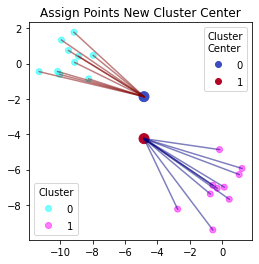

In [7]:
fig, ax = plt.subplots(figsize=(4,4))
y_t=np.sum((X-cent[0,:])**2,axis=1)**0.5<np.sum((X-cent[1,:])**2,axis=1)**0.5 
cmap = plt.get_cmap('jet')
colors = cmap(np.linspace(0, 1.0, 2))
for ind in range(len(y_t)):
    if y_t[ind] == True:
        ax.plot([X[ind][0],cent[0][0]],[X[ind][1],cent[0][1]],c=colors[0], alpha=0.5)
    else:
        ax.plot([X[ind][0],cent[1][0]],[X[ind][1],cent[1][1]],c=colors[1], alpha=0.5)

scatter = ax.scatter(X[:,0],X[:,1],c=y_t,cmap=plt.cm.cool,alpha=0.5)
center = ax.scatter(cent[:,0],cent[:,1],c=[1,0],s=100,cmap=plt.cm.coolwarm)

legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Cluster")
legend2 = ax.legend(*center.legend_elements(),
                    loc="upper right", title="Cluster\nCenter")
plt.gca().add_artist(legend1)
ax.set_title('Assign Points New Cluster Center')


Text(0.5, 1.0, 'New Assign Results')

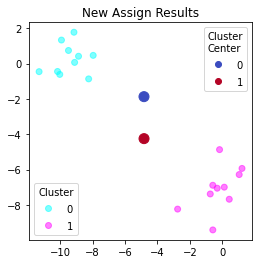

In [8]:
fig, ax = plt.subplots(figsize=(4,4))

scatter = ax.scatter(X[:,0],X[:,1],c=y_t,cmap=plt.cm.cool,alpha=0.5)
center = ax.scatter(cent[:,0],cent[:,1],c=[1,0],s=100,cmap=plt.cm.coolwarm)

legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Cluster")
legend2 = ax.legend(*center.legend_elements(),
                    loc="upper right", title="Cluster\nCenter")
plt.gca().add_artist(legend1)
ax.set_title('New Assign Results')


Text(0.5, 1.0, 'New Cluster Centers')

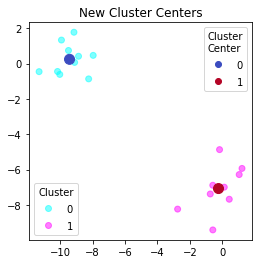

In [9]:
cent=np.asarray([[np.sum(X[:,0]*y_t)/(np.sum(y_t)),np.sum(X[:,1]*y_t)/np.sum(y_t)],
        [np.sum(X[:,0]*(1-y_t))/np.sum(1-y_t),np.sum(X[:,1]*(1-y_t))/np.sum(1-y_t)]])
y_t=np.sum((X-cent[0,:])**2,axis=1)**0.5<np.sum((X-cent[1,:])**2,axis=1)**0.5 #attach points to clustering based on centroid proximity

fig, ax = plt.subplots(figsize=(4,4))
scatter = ax.scatter(X[:,0],X[:,1],c=y_t,cmap=plt.cm.cool,alpha=0.5)
center = ax.scatter(cent[:,0],cent[:,1],c=[1,0],s=100,cmap=plt.cm.coolwarm)

legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Cluster")
legend2 = ax.legend(*center.legend_elements(),
                    loc="upper right", title="Cluster\nCenter")
plt.gca().add_artist(legend1)
ax.set_title('New Cluster Centers')


Text(0.5, 1.0, 'Assign Points New Cluster Center')

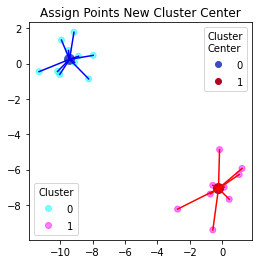

In [10]:
fig, ax = plt.subplots(figsize=(4,4))
# #visualize clustering with different colors
for ind in range(len(y_t)):
    if y_t[ind] == True:
        plt.plot([X[ind][0],cent[0][0]],[X[ind][1],cent[0][1]],'r')
    else:
        plt.plot([X[ind][0],cent[1][0]],[X[ind][1],cent[1][1]],'b')
        
scatter = ax.scatter(X[:,0],X[:,1],c=y_t,cmap=plt.cm.cool,alpha=0.5)
center = ax.scatter(cent[:,0],cent[:,1],c=[1,0],s=100,cmap=plt.cm.coolwarm)

legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Cluster")
legend2 = ax.legend(*center.legend_elements(),
                    loc="upper right", title="Cluster\nCenter")
plt.gca().add_artist(legend1)
ax.set_title('Assign Points New Cluster Center')

Text(0.5, 1.0, 'New Assign Results')

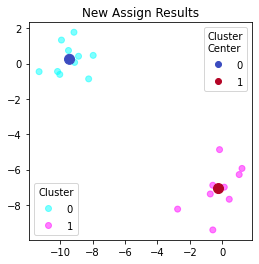

In [11]:
fig, ax = plt.subplots(figsize=(4,4))

scatter = ax.scatter(X[:,0],X[:,1],c=y_t,cmap=plt.cm.cool,alpha=0.5)
center = ax.scatter(cent[:,0],cent[:,1],c=[1,0],s=100,cmap=plt.cm.coolwarm)

legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Cluster")
legend2 = ax.legend(*center.legend_elements(),
                    loc="upper right", title="Cluster\nCenter")
plt.gca().add_artist(legend1)
ax.set_title('New Assign Results')


In [12]:
#now do the same with KMeans from sklearn.cluster
from sklearn.cluster import KMeans

In [13]:
#initialize the model
km=KMeans(random_state=1,n_clusters=2) #look for two clusters; 
#k-means generally depends on random initial locations of the centroids, 
#so setting random state needed for result stability (although not really this time)
res=km.fit(X) #train the model
y_t=res.labels_
print(y_t) #output the result
# print res.predict(X) #alternative - one can pass this or other data to cluster according to the model trained (centroids) 

[0 0 0 1 1 0 1 0 1 1 1 1 0 1 0 0 1 0 1 0]


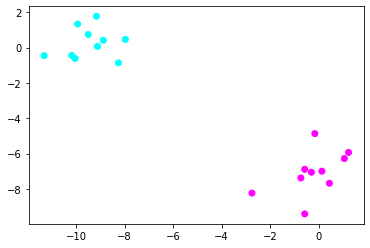

In [14]:
#visualize the clusters
plt.scatter(X[:,0],X[:,1],c=y_t,cmap=plt.cm.cool)

### Example 2: Picking the number of clusters

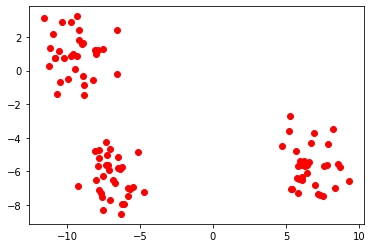

In [15]:
#generate another example 
X, y = make_blobs(n_features=2, centers=3,random_state=9999)
plt.scatter(X[:,0],X[:,1],c="r")
plt.show()

In [16]:
n=2 # number of clusters
tar=y # real target

#train the model
km=KMeans(random_state=324,n_clusters=n)
res=km.fit(X)
print(res.labels_)

[0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 0 1
 0 0 0 1 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0
 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1]


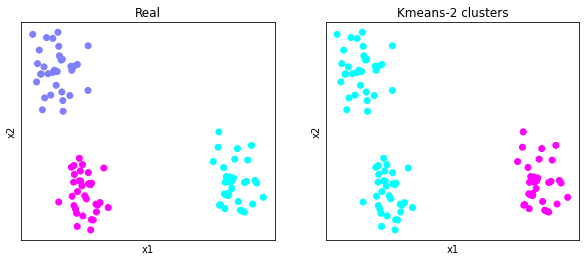

In [17]:
#Plot the original cluster assignment in the generated data against the results of k-means
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)

plt.scatter(X[:, 0], X[:, 1], c=tar, cmap=plt.cm.cool)
plt.xlabel('x1')
plt.ylabel('x2')
plt.xticks(())
plt.yticks(())
plt.title("Real")

plt.subplot(1,2,2)
plt.scatter(X[:, 0], X[:, 1], c=res.labels_, cmap=plt.cm.cool)
plt.xlabel('x1')
plt.ylabel('x2')
plt.xticks(())
plt.yticks(())
plt.title("Kmeans-{} clusters".format(n))
plt.show()

### So maybe k=3 is more appropriate? 
We see it visualially and from knowing how data was generated, but how can we quantitatively figure it out?

### *Choose the number of clusters. (k)

#### Silhouette Coefficient
In the example above we visually see that the data could still be clustered further. So how to select the appropriate number of clusters $k$ besides just naive visual observations? 

We can't use SD here anymore as the more clusters we take, the smaller it goes, and we'll get it down to zero, assigning each point to its own cluster, which is certianly not the most useful way of clustering.

We need another partitioning quality measure here. Most common option is using a Silhouette measure, which for each data point $x_i$ quantifies its relative attachement strength to its current cluster vs the closest neighbor cluster:
$$
s(i)=\frac{\min\limits_{k\neq c_i} \|x_i-\mu_{c_k}\|-\|x_i-\mu_{c_i}\|}{\max\{\|x_i-\mu_{c_i}\|,\min\limits_{k\neq c_i} \|x_i-\mu_{c_k}\|\}}.
$$

Then internal quality of the partitioning is characterized by an average ratio value of silhouette for all the data points:
$$
S=\frac{\sum\limits_i s(i)}{N}.
$$

By definition, the silhouette measure is normalized. i.e. $-1\leq s(i)\leq 1$ and so is the average: $-1\leq S\leq 1$. $S=1$ means that all the points coinside with their cluster centroids, values close to 1 mean that the points are usually much closer to their cluster centroids than to all the other ones (i.e. clustered appropriately), values of $S$ around zero mean that clustering is quite unstable, i.e. moving many of the points to another clusters might not affect its quality much; while negative values of $S$ mean that clustering could certainly be improved by moving some of the points to the other clusters.

In [18]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2, 3, 4, 5]
for n_clusters in range_n_clusters: #try different numbers of clusters
    km = KMeans(n_clusters=n_clusters, random_state=324)
    cluster_labels = km.fit_predict(X)
    #report average Silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters ={},".format(n_clusters)+" the average silhouette_score is :{}".format(silhouette_avg))

For n_clusters =2, the average silhouette_score is :0.7368734857292675
For n_clusters =3, the average silhouette_score is :0.7671939254942522
For n_clusters =4, the average silhouette_score is :0.6349411044958128
For n_clusters =5, the average silhouette_score is :0.5320171643922585


In [19]:
#the highest one is acheived for k=3

#### From the result of silhouette_score, we should choose k=3. 
Let's also visualize the individual silhouette score distributions for each point. This allows to diagnose which exact clusters are in good standing and which might be a problem by comparing their members' scores against average

In [20]:
def silhouette_score_plot(data,range_n_clusters):
    X=data
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(10, 5)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=324)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)

        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors)

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1],
                    marker='o', c="white", alpha=1, s=200)

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

        plt.show()

For n_clusters = 2 The average silhouette_score is : 0.7368734857292675


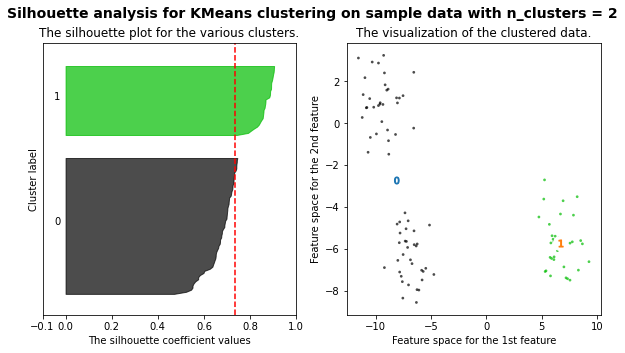

For n_clusters = 3 The average silhouette_score is : 0.7671939254942522


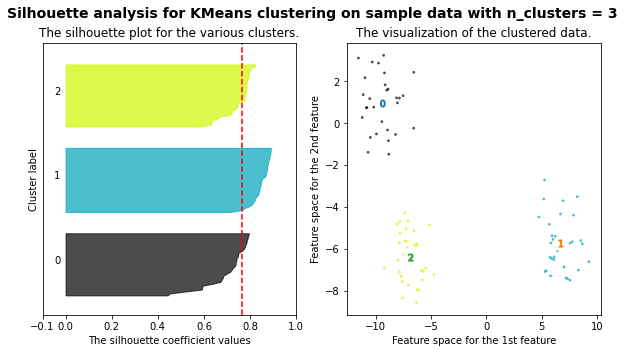

For n_clusters = 4 The average silhouette_score is : 0.6349411044958128


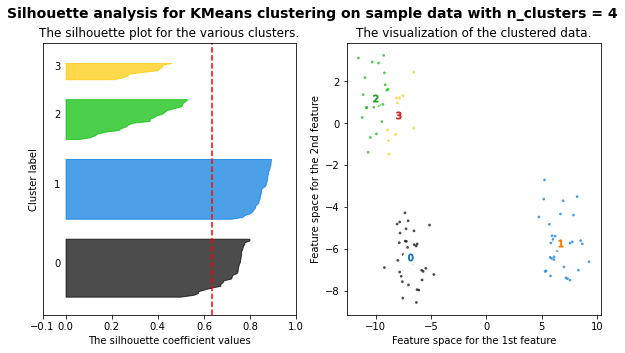

For n_clusters = 5 The average silhouette_score is : 0.5320171643922585


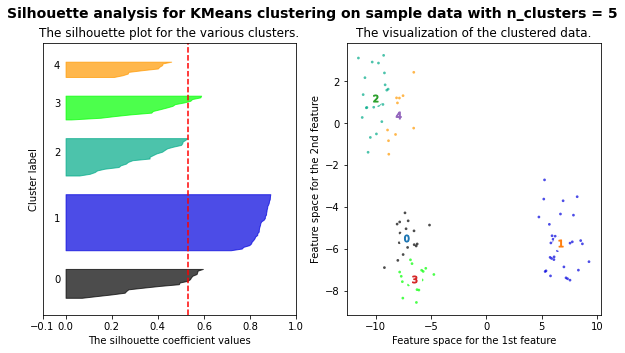

In [21]:
#plot
silhouette_score_plot(X,range(2,6))

### Elbow Method
The Elbow method looks at the variance of the data remaining unexplained after clustering, measured through
$$
SD=\sum_i \|x_i-\mu_{c(i)}\|^2
$$
as above or the percentage of the initial data varience (one minus SD normalized by initial variance).

Then it analyzes its dynamics as a function of the number of clusters $k$. One should choose a number of clusters so that adding another cluster doesn't provide much improvement aleady. Imagine there is a price of introducing a new cluster (e.g. using a service center placement analogy from the lecture, building an additional center costs some resources). If you plot SD against the k, you will see that it decreases as k gets larger as the more clusters and centroids we introduce the closer are the points to the centroids. Initially the drop in SD is steep, so adding each new cluster pays off. But at some point, when the drop slows down significantly, the improvement in SD may not justify the the cost of adding a new cluster. At that point one should stop increasing the $k$. 

If we specify the cost of adding a new cluster numerically, this can lead to a robust optimization criteria. 
The Elbow method suggests an intuitive geometric approach, choosing the k at which the speed of the SD change decreases abruptly. This produces an "elbow effect" in the graph, as you can see in the following picture below.


In [22]:
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans

def elbow(data,K):
#data is your input as numpy form
#K is a list of number of clusters you would like to show.
    # Run the KMeans model and save all the results for each number of clusters
    KM = [KMeans(n_clusters=k).fit(data) for k in K]
    
    # Save the centroids for each model with a increasing k
    centroids = [k.cluster_centers_ for k in KM]

    # For each k, get the distance between the data with each center. 
    D_k = [cdist(data, cent, 'euclidean') for cent in centroids]
    
    # But we only need the distance to the nearest centroid since we only calculate dist(x,ci) for its own cluster.
    globals()['dist'] = [np.min(D,axis=1) for D in D_k]
    
    # Calculate the Average SSE.
    avgWithinSS = [sum(d)/data.shape[0] for d in dist]
    
    
    # elbow curve
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, avgWithinSS, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Average within-cluster sum of squares')
    plt.title('Elbow for KMeans clustering')
    plt.show()
    
    
    # Total with-in sum of square plot. Another way to show the result.
    wcss = [sum(d**2) for d in dist]
    tss = sum(pdist(data)**2)/data.shape[0]
    bss = tss-wcss
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, bss/tss*100, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Percentage of variance explained')
    plt.title('Elbow for KMeans clustering')
    plt.show()

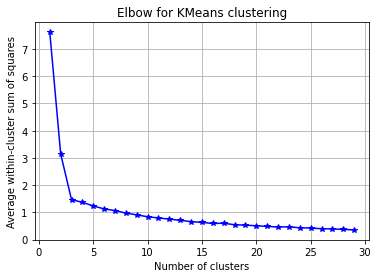

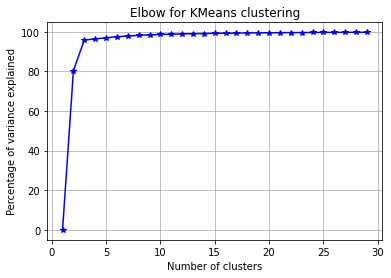

In [23]:
elbow(X, range(1,30))

### Example 3: Guassian Mixture. When KMeans does not work well.

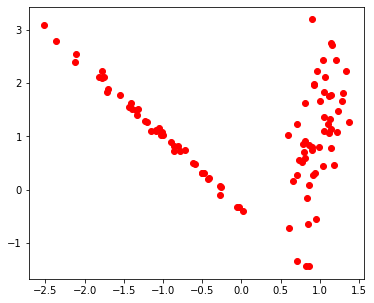

In [24]:
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                             n_clusters_per_class=1,random_state=13) #other good options: 13!!!, 14!!!, 17!!!, 19!!!, 5,8,12
plt.figure(figsize=(6,5))
plt.scatter(X[:,0],X[:,1],c="r")
plt.show()

Let us see what k-means will produce

In [25]:
# Real vs KMeans vs Guassian Mixture
n=2 # number of clusters
dd=X #data
tar=y # real target

km=KMeans(n_clusters=n)
res=km.fit(dd)
#res.labels_

Text(0.5, 1.0, 'Kmeans-2 clusters')

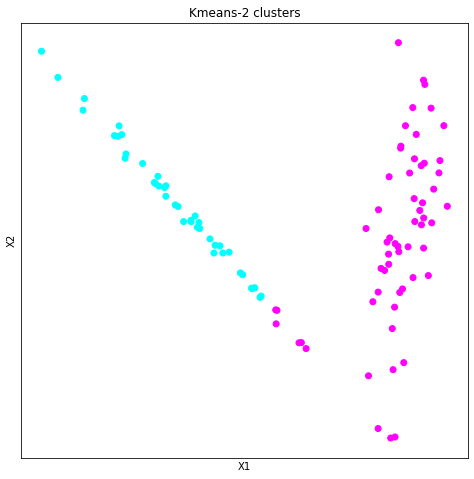

In [26]:
plt.figure(figsize=(8,8))
plt.scatter(dd[:, 0], dd[:, 1], c=res.labels_, cmap=plt.cm.cool)
plt.xlabel('X1')
plt.ylabel('X2')
plt.xticks(())
plt.yticks(())
plt.title("Kmeans-{} clusters".format(n))

This is because k-means distance-based objective function is defined in such a way where all directions are equal. This way it tends to produce circular/spherical clusters.

Let's generalize this approach to account for the clusters of more general shape. A probabilistic approach defines k-means through looking for independent normal distributions $x_i^j\sim N(\mu_{c}^j,\sigma^2)$ with the same fixed variance to explain observations for the coordinates $x_i^j$. But assuming the constant variance $\sigma^2$ implies that the resulting clusters should all be of approximately same dimension along each coordinate. But in general this might not be case and the variances do not have to be the same for different coordinates. Furthermore distributions for different coordinates might not be independent - the correlations would result in the clusters of different orientation in space.

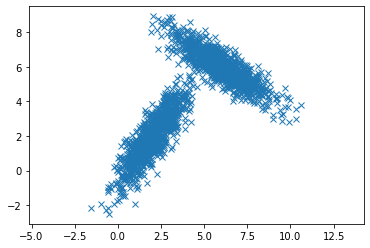

In [27]:
#consider a process where two sets of points are produces by multinomial normal distributions with non-diagonal covariance matrixes (leading to correlated coordinates)
mean = [2, 2]
cov = [[1, 1.2], [1.2, 2]]
x1, y1 = np.random.multivariate_normal(mean, cov, 1000).T
mean = [6, 6]
cov = [[2, -1.2], [-1.2, 1]]
x2, y2 = np.random.multivariate_normal(mean, cov, 1000).T
x=np.concatenate([x1,x2]); y=np.concatenate([y1,y2]);
plt.plot(x, y, 'x')
plt.axis('equal')
plt.show()

In order to account for those heterogenieties, the Gaussian Mixture model will look for the set of multinomial normal distributions with arbitrary covariance matrixes which are best suited to explain the data accross different clusters and will cluster the points based on which of the distribution they are the most likely to be produced by. Moreover it admits uncertainty in this attachment replacing discrete cluster attachments $c(i)$ with a probabilistic $p(i,c)=P(c(i)=c)$, provided that $\sum_c p(i,c)=1$.

Namely it will look for the probabilistic data representation mixing several Gaussian distributions
$$
x_i\sim\sum_c p(i,c) N(\mu_c,\Sigma_c)
$$
with arbitrary means $\mu_c$, co-variance matrixes $\Sigma_c$ and attachment probabilities $p(i,c)$ to be fit in such a way that joint likelihood of the original data observations is maximized. If one needs discrete cluster attachments, those can be obtained as
$$
c(i)={\rm argmax_c} p(i,c)
$$

Make sure that you are using the recent sklearn: 0.18. (The old verison does not work correctly)

If not, please go to the terminal and use the following code to upgrade it.

conda install scikit-learn

In [28]:
# Check Sklearn version.
import sklearn
sklearn.__version__

'1.0.1'

In [29]:
#train the Gausian mixture model fitting two distributions
from sklearn.mixture import GaussianMixture # You can import this only if you are using 0.18+ sklearn.
gm=GaussianMixture(n_components=2,random_state=324)
res1=gm.fit(np.array([x,y]).transpose())

In [30]:
#and see if it got the original means and variances right
res1.means_

array([[1.99281828, 1.95961217],
       [6.03159628, 5.98908225]])

In [31]:
res1.covariances_

array([[[ 1.0059475 ,  1.22583436],
        [ 1.22583436,  2.04709928]],

       [[ 2.06586708, -1.2560145 ],
        [-1.2560145 ,  1.04567083]]])

Now use Gaussian Mixture model for the initial case above comparing the results vs k-means

In [32]:
from sklearn.mixture import GaussianMixture # You can import this only if you are using 0.18+ sklearn.
gm=GaussianMixture(n_components=n,random_state=324)
res1=gm.fit(dd)

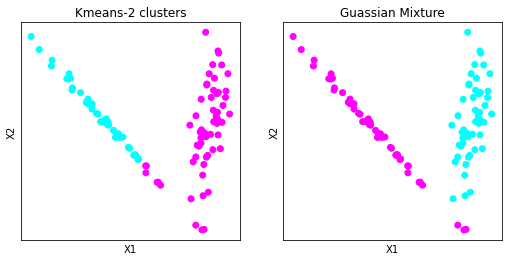

In [33]:
#Plot.
plt.figure(figsize=(18,4))
plt.subplot(1,3,1)
plt.scatter(dd[:, 0], dd[:, 1], c=tar, cmap=plt.cm.cool)
plt.xlabel('X1')
plt.ylabel('X2')
plt.xticks(())
plt.yticks(())
plt.title("Original data clustering")

plt.subplot(1,4,2)
plt.scatter(dd[:, 0], dd[:, 1], c=res.labels_, cmap=plt.cm.cool)
plt.xlabel('X1')
plt.ylabel('X2')
plt.xticks(())
plt.yticks(())
plt.title("Kmeans-{} clusters".format(n))

plt.subplot(1,4,3)
plt.scatter(dd[:, 0], dd[:, 1], c=res1.predict(dd), cmap=plt.cm.cool)
plt.xlabel('X1')
plt.ylabel('X2')
plt.xticks(())
plt.yticks(())
plt.title("Guassian Mixture")

plt.show()


### Example 4. Where even Gaussian Mixture fails - case for DBSCAN

In [34]:
n_samples = 1500
np.random.seed(0)
from sklearn import datasets
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
X=noisy_circles[0]
L=noisy_circles[1]

Text(0, 0.5, 'X2')

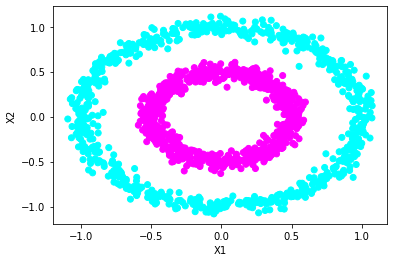

In [35]:
#original data clustering
plt.scatter(X[:, 0], X[:, 1], c=L, cmap=plt.cm.cool)
plt.xlabel('X1')
plt.ylabel('X2')

In [36]:
#train Gaussian Mixture (as per above we should not even try k-means for such a case)
res1=GaussianMixture(n_components=n,random_state=324).fit(X)
L2=res1.predict(X)

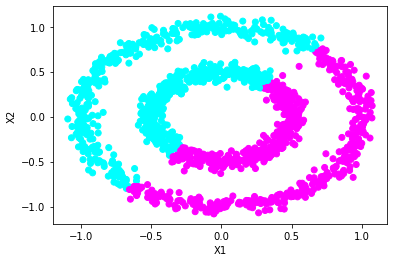

In [37]:
plt.scatter(X[:, 0], X[:, 1], c=L2, cmap=plt.cm.cool)
plt.xlabel('X1');
plt.ylabel('X2');

Even Gaussian Mixture model fails here as the underlying clusters do not look like consistent areas. We might use a different approach as below

DBSCAN - Density-Based Spatial Clustering of Applications with Noise. Finds core subsets of high density (each core point has at least a given number of neighbors first `min_samples` within an `eps` neighborhood) and expands clusters from those core areas sequentially attaching the points within the distance `eps`). The approach is suitable for finding clusters of an arbitrary shape, but they need to be of approximately same density. Also the target number of clusters does not need to be specified (will be provided by the algorithm), however `min_samples` and `eps` need to be selected instead. So the method is suitable when one can get some intuition on the local structure of the clusters, including the typical distances between the points.

The method can also detect outliers which can't be attached to either of the clusters

More information can be found under the following links:

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

https://en.wikipedia.org/wiki/DBSCAN

In [38]:
from sklearn.cluster import DBSCAN

In [39]:
#now try DBSCAN
res2 = DBSCAN(eps=0.1, min_samples=4).fit(X)
L2=res2.labels_

Text(0, 0.5, 'X2')

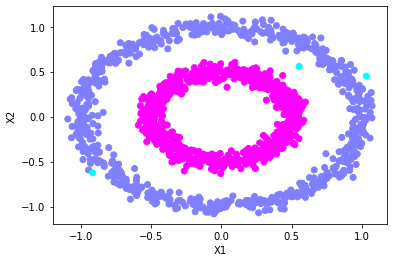

In [40]:
plt.scatter(X[:, 0], X[:, 1], c=L2, cmap=plt.cm.cool)
plt.xlabel('X1')
plt.ylabel('X2')

### Real world case: 311 requests as a signature of urban location

Can we distinguish urban locations based on their 311 activity? Before we've seen that plotting location by PC's of their 311 activity can help distinguishing boroughs. This time lets directly cluster locations by their 311 signatures to see what exact zones do they identify and if this makes urban sense.

Use Kmeans to cluster NYC zip codes into 4 clusters. As before, the feature space is the percentages of 311 activity per category (from "Adopt A Basket" to the end) as provided.  Report the number of zip codes in each clusters. 

Visulize the clustering result on the map (for this part we will introduce geopandas).

This goes along the lines of our recent paper [Wang, L., Qian, C., Kats, P., Kontokosta, C., & Sobolevsky, S. (2017). Structure of 311 service requests as a signature of urban location. PloS one, 12(10), e0186314.]

In [46]:
#upload previous data we had on 311
data311 = pd.read_csv( 'Data/aggr311.csv')
data311.head()

,Zip,Complain,Count
0,NaN,Adopt-A-Basket,5
1,10001,Adopt-A-Basket,1
2,10003,Adopt-A-Basket,1
3,10009,Adopt-A-Basket,1
4,10010,Adopt-A-Basket,1


In [47]:
data311.Zip=pd.to_numeric(data311.Zip,errors='coerce') #make zip codes numeric

In [48]:
data311=data311.loc[(data311.Zip>=10000)&(data311.Zip<11500)] #take only NYC zip codes (roughly by range)

In [49]:
#convert a list to a 2d table with zip codes as rows and complaint types as columns
data311=pd.pivot_table(data311,index='Zip',columns='Complain',values='Count',fill_value=0)

In [50]:
data311.head()

Complain,APPLIANCE,Adopt-A-Basket,Air Quality,Animal Abuse,Animal Facility - No Permit,Animal in a Park,Asbestos,BEST/Site Safety,Beach/Pool/Sauna Complaint,Bike Rack Condition,...,Unsanitary Pigeon Condition,Urinating in Public,Vacant Lot,Vending,Violation of Park Rules,Water Conservation,Water Quality,Water System,Window Guard,X-Ray Machine/Equipment
Zip,,,,,,,,,,,,,,,,,,,,,
10000.0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,8,8,0,0,0,0,0
10001.0,0,1,90,0,0,1,20,36,1,1,...,3,0,2,51,5,5,2,366,0,0
10002.0,15,0,80,0,0,21,18,20,2,6,...,5,1,4,27,14,10,7,324,0,0
10003.0,15,1,143,0,2,44,24,13,2,2,...,7,11,2,54,25,12,5,318,0,0
10004.0,0,0,15,0,0,4,3,1,0,1,...,1,1,0,16,21,0,0,37,0,0


In [51]:
#normalize complaints of each type within each zip code by total zip code activity to get size-independent complaints profiles
Total311=data311.sum(axis=1) #total 311 activity per zip code
data311Normalized=data311.div(data311.sum(axis=1), axis=0) #normalize activity of various cathegories within zip code by total
data311Normalized=data311Normalized.loc[Total311>100] #keep only those zip codes having sufficient activity

In [52]:
data311Normalized.head()

Complain,APPLIANCE,Adopt-A-Basket,Air Quality,Animal Abuse,Animal Facility - No Permit,Animal in a Park,Asbestos,BEST/Site Safety,Beach/Pool/Sauna Complaint,Bike Rack Condition,...,Unsanitary Pigeon Condition,Urinating in Public,Vacant Lot,Vending,Violation of Park Rules,Water Conservation,Water Quality,Water System,Window Guard,X-Ray Machine/Equipment
Zip,,,,,,,,,,,,,,,,,,,,,
10000.0,0.000000,0.000000,0.008772,0.0,0.000000,0.008772,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.070175,0.070175,0.000000,0.000000,0.000000,0.0,0.0
10001.0,0.000000,0.000146,0.013179,0.0,0.000000,0.000146,0.002929,0.005272,0.000146,0.000146,...,0.000439,0.000000,0.000293,0.007468,0.000732,0.000732,0.000293,0.053595,0.0,0.0
10002.0,0.001330,0.000000,0.007095,0.0,0.000000,0.001862,0.001596,0.001774,0.000177,0.000532,...,0.000443,0.000089,0.000355,0.002394,0.001242,0.000887,0.000621,0.028734,0.0,0.0
10003.0,0.001331,0.000089,0.012690,0.0,0.000177,0.003905,0.002130,0.001154,0.000177,0.000177,...,0.000621,0.000976,0.000177,0.004792,0.002218,0.001065,0.000444,0.028219,0.0,0.0
10004.0,0.000000,0.000000,0.009740,0.0,0.000000,0.002597,0.001948,0.000649,0.000000,0.000649,...,0.000649,0.000649,0.000000,0.010390,0.013636,0.000000,0.000000,0.024026,0.0,0.0


In [53]:
#apply clustering to the zip codes based on their complaint profiles
#rr=KMeans(n_clusters=3, n_init=10, random_state=0).fit(data311Normalized)
rr = GaussianMixture(n_components = 3, random_state = 0).fit(data311Normalized)
rr.labels_ = rr.predict(data311Normalized) #get labels

In [54]:
max(rr.labels_)

2

In [55]:
#create a dictionary mapping zip codes to cluster labels
clust={data311Normalized.index[i]:rr.labels_[i] for i in range(len(rr.labels_))}

In [56]:
#create a dataframe
res=pd.DataFrame({'zipcode':data311Normalized.index, 'label':rr.labels_})

In [57]:
import geopandas as gpd

In [61]:
#read shapefiles of NYC zip codes
NYCzip=gpd.read_file("Data/NY.geojson")

In [62]:
NYCzip.head() #geopandas looks pretty much like pandas dataframe including both - labels/parameters and geometry - of the shapes

,zipcode,geometry
0,11372.0,"POLYGON Z ((-73.86942 40.74916 0.00000, -73.89..."
1,11004.0,"POLYGON Z ((-73.71068 40.75004 0.00000, -73.70..."
2,11040.0,"POLYGON Z ((-73.70098 40.73890 0.00000, -73.70..."
3,11426.0,"POLYGON Z ((-73.72270 40.75373 0.00000, -73.72..."
4,11365.0,"POLYGON Z ((-73.81089 40.72717 0.00000, -73.81..."


<AxesSubplot:>

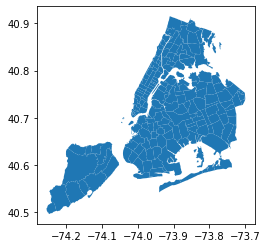

In [63]:
#or all together
NYCzip.plot()

In [64]:
#characterize each cluster by its aggregated complaint profile
clusterChar = data311.reset_index().merge(res,left_on='Zip',right_on='zipcode').\
                groupby(['label']).sum().reset_index()

In [65]:
#normalize by total cluster activity
clusterChar = clusterChar[[col for col in clusterChar.columns if col not in ['label','Zip','zipcode']]]
clusterChar = clusterChar.div(clusterChar.sum(axis=1), axis=0)
clusterChar['label'] = [0,1,2]

In [66]:
#leave only the most frequent complaint types (more than 30.000 for the whole city)
frequentComplain = data311.columns[(data311.sum()>30000).values]

In [67]:
clusterChar = clusterChar[list(frequentComplain)]

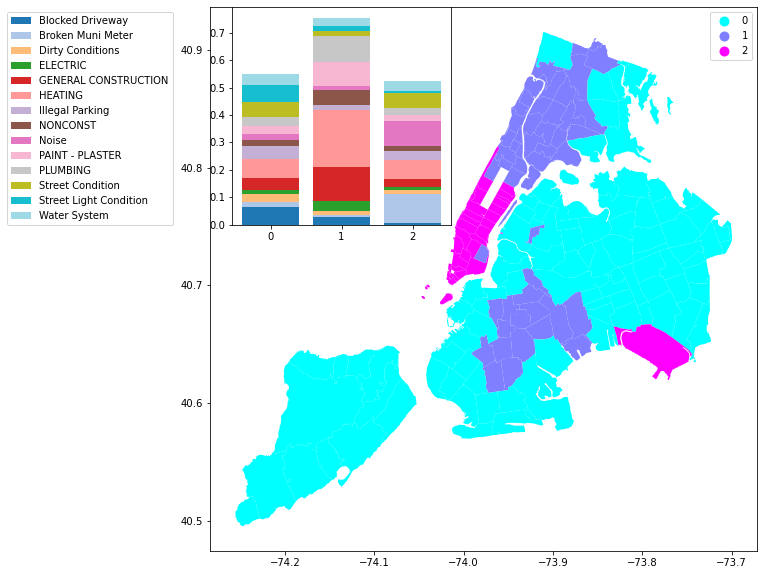

In [68]:
#visualize the clustering together with the categorical complaint profile of each cluster
res['label'] = res['label'].astype(str)
fig,ax = plt.subplots(nrows=1, ncols=1,figsize=(20,10))
NYCzip.merge(res,on='zipcode').plot(column='label',cmap='cool', 
                                    legend=True,ax=ax)
ins = ax.inset_axes([0.04,0.6,0.4,0.4])
NUM_COLORS = len(clusterChar.columns)
cm = plt.cm.get_cmap('tab20', NUM_COLORS)

ins.set_prop_cycle(color = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
bot = np.zeros(3)


for col in clusterChar.columns:
    if col!= 'label' and col!='Zip' and col!='zipcode':
        values = clusterChar[col].values
        ins.bar([0,1,2], values, bottom = bot, label=col)
        bot = bot + values
ins.set_xticks([0,1,2])    
ins.legend(bbox_to_anchor=(-0.25, 1))   


So we can see that the clustering splits the city into 3 zones of pretty distinctive socio-economic profile.

And one can see that the complaint profiles are somewhat distinctive accross the clusters. People within the Cluster 0 (residential areas in outer boroughs) are relatively more concerned about street conditions and blocked driveways (as there are many single family houses with driveways), Cluster 1 (many low-income residences) is relatively more concerned about housing conditions: heating, plumbing, paint and general construction; while cluster 2 (Lower-mid Manhattan and JFK) is concerned about noise and broken meters - this is a highly congested area with lots of street noise and tough parking. 

# Homework Task 1
Let's explore clustering models on the artificial data set below

In [71]:
data1=pd.read_csv('Data/data1.csv')
data1=data1.iloc[:,:2]
data1.head()

,1,2
0,0.624358,-0.007694
1,2.090884,7.405251
2,2.498841,7.292161
3,2.009998,7.408158
4,2.236813,7.245803


#### Q1) Visualize the data

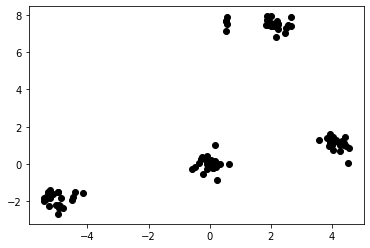

In [72]:
data1 = np.array(data1)
plt.figure()
plt.scatter(data1[:,0],data1[:,1],c="k",)
plt.show()

#### Q2) Use K-means to cluster the original data with k=5 clusters. Report the resulting labels. 

In [73]:
model = KMeans(n_clusters = 5)
model = model.fit(data1)
label = model.predict(data1)
label

array([2, 0, 0, 0, 0, 0, 4, 4, 4, 4, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

#### Q3) Visualize the clustering result and color the points according to the labels obtained in part b)
hint: you can use the first two columns only

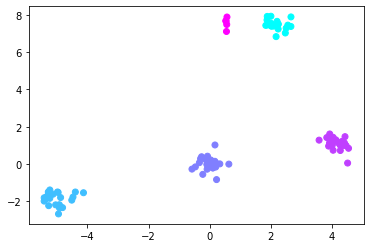

In [74]:
plt.scatter(data1[:,0],data1[:,1],c=label,cmap=plt.cm.cool)

#### Q4) Justify the choice of k (the optimal number of clusters for K-means clustering; feel free to try k from 2 to 10) by first using silhouette_score and then the Elbow method on the original data. Briefly explain your approach

In [75]:
for n_clusters in range(2,11): #try different numbers of clusters
    km = KMeans(n_clusters=n_clusters, random_state=324)
    cluster_labels = km.fit_predict(data1)
    #report average Silhouette score
    silhouette_avg = silhouette_score(data1, cluster_labels)
    print("For n_clusters ={},".format(n_clusters)+" the average silhouette_score is :{}".format(silhouette_avg))

For n_clusters =2, the average silhouette_score is :0.5704180170848508
For n_clusters =3, the average silhouette_score is :0.7446543472476302
For n_clusters =4, the average silhouette_score is :0.8806219682734302
For n_clusters =5, the average silhouette_score is :0.8445807368232318
For n_clusters =6, the average silhouette_score is :0.7279567557134302
For n_clusters =7, the average silhouette_score is :0.7617040683546824
For n_clusters =8, the average silhouette_score is :0.6145268244576092
For n_clusters =9, the average silhouette_score is :0.5126038521172481
For n_clusters =10, the average silhouette_score is :0.44190690992627013


## silhouette_score explain
As the scores below, we should choose n_cluster = 4, which has the highest score shows the best n cluster.

silhouette_score shows for each data point x quantifies its relative attachement strength to its current cluster,
vs the closest neighbor cluster. 

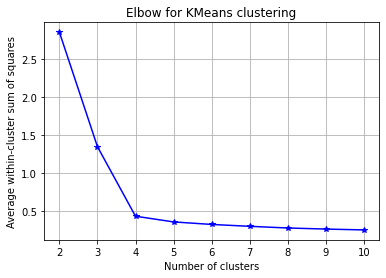

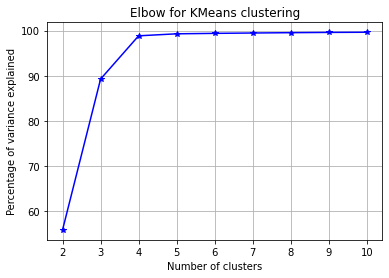

In [76]:
elbow(data1, range(2,11))

## Elbow explain
plot 1 below shows the performance increasing after 4 is not too effective.
plot 2 below shows when we use 4 clusters rather than 3, the percentage of varience explained increase from 90% to ~97%, after 4, the increase speed are significant decrease, which means it may occur overfitting.
Elbow shows the price to increase a cluster, because high cluster number will affect the robustness, we can get how
much cluster we choose.


#### Q5) Use a Gaussian Mixture model instead of K-means with the optimal k found in Q4, visualize the resulting clustering

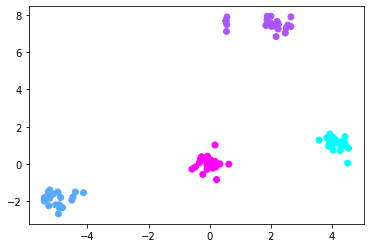

In [77]:
gm=GaussianMixture(n_components=4,random_state=324)
res1=gm.fit(data1)
plt.scatter(data1[:, 0], data1[:, 1], c=res1.predict(data1), cmap=plt.cm.cool)

# Homework task 2

Cluster urban locations based on their mobility structrue (%% of trips by each mobility mode within the total trips per location)

In [80]:
#Upload the main dataset
SMdata=pd.read_csv("Data/Socio-mobility.csv")

In [81]:
SMdata

,tz,population,male,female,age_under_14,age_15_29,age_30_54,age_55_over,white,black,...,unemployment_rate,percent_uninsured,mean_price_per_sqft,median_price_per_sqft,citibike_spatial,mobile-device_spatial,sr311_spatial,subway_spatial,taxi_spatial,twitter_spatial
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,383102,0,0.0,95418,1546
1,2,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,6348,0,0.0,73,44
2,3,32450.0,15235.0,17215.0,16.351856,20.033410,34.419509,29.195225,31.959938,35.189522,...,10.045116,8.402712,318.691787,315.104167,0,109300,700,225527.5,31960,480
3,4,27571.0,12546.0,15025.0,12.032675,24.910563,38.007785,25.048977,40.201661,13.778971,...,9.031957,8.955406,NaN,NaN,31545,179644,399,0.0,178515,85
4,5,26482.0,13082.0,13400.0,18.400166,17.316894,36.133183,28.149757,89.064270,1.771014,...,5.503406,3.673850,289.552591,276.162791,0,56271,490,0.0,3667,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,259,44064.0,20502.0,23562.0,17.150757,22.004275,34.482983,26.361984,21.362110,61.555919,...,10.602008,10.301060,247.453128,243.542911,0,461017,1142,1065402.0,43841,274
259,260,45702.0,23401.0,22301.0,16.373437,19.598034,39.453075,24.575453,46.781322,1.444138,...,6.819275,18.911168,443.492147,441.390182,0,353643,754,3635465.0,138882,725
260,261,4537.0,1889.0,2648.0,9.890110,35.564436,47.552448,6.993007,68.415252,2.689002,...,3.000000,4.000000,NaN,NaN,19131,258407,323,6178926.0,225140,523
261,262,35483.0,14871.0,20612.0,13.053496,18.493265,35.472574,32.980665,83.324409,4.512020,...,3.683347,5.183719,725.503394,758.505298,13129,93861,283,0.0,315300,378


In [82]:
#rename some of the columns for the sake of consistency and also to replace '-'
SMdata.rename(columns={'mobile-device_spatial':'mobile','citibike_spatial':'citibike','sr311_spatial':'sr311','subway_spatial':'subway','taxi_spatial':'taxi','twitter_spatial':'twitter'},inplace=True)

In [85]:
#also upload two other datasets from the last class - residential and working population
LEHDW=pd.read_csv("Data/LEHD-work.csv")

In [87]:
#notice that residetial population here (from LEHD, based on the workforce residences) 
#is different from the one in the main dataset 
LEHDR=pd.read_csv("Data/LEHD-resident.csv")

In [88]:
#merge the dataframes (inner merge on index - taxi zone number); take only the columns to use later
SMdata=SMdata[['population','mobile','citibike','sr311','subway','taxi','twitter']].merge(LEHDW[['total']].rename(columns={'total':'working'}), on=None, left_index=True, right_index=True, how='inner')

In [89]:
SMdata=SMdata.merge(LEHDR[['total']].rename(columns={'total':'residential'}), on=None, left_index=True, right_index=True, how='inner')

In [90]:
#glimpse into the final data
SMdata.head()

,population,mobile,citibike,sr311,subway,taxi,twitter,working,residential
0,NaN,383102,0,0,0.0,95418,1546,4989,198
1,0.0,6348,0,0,0.0,73,44,2717,11398
2,32450.0,109300,0,700,225527.5,31960,480,1191,12318
3,27571.0,179644,31545,399,0.0,178515,85,2495,10751
4,26482.0,56271,0,490,0.0,3667,40,17223,6729


In [94]:
#read shapefiles of NYC taxi zones
tzs=gpd.read_file("Data/taxizone.geojson")
tzs.location_id = tzs.location_id.astype(int)
tzs.shape_area = tzs.shape_area.astype(float)

In [95]:
tzs.head()

,shape_area,objectid,shape_leng,location_id,zone,borough,geometry
0,0.000782,1,0.116357453189,1,Newark Airport,EWR,"MULTIPOLYGON (((-74.18445 40.69500, -74.18449 ..."
1,0.004866,2,0.43346966679,2,Jamaica Bay,Queens,"MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ..."
2,0.000314,3,0.0843411059012,3,Allerton/Pelham Gardens,Bronx,"MULTIPOLYGON (((-73.84793 40.87134, -73.84725 ..."
3,0.000112,4,0.0435665270921,4,Alphabet City,Manhattan,"MULTIPOLYGON (((-73.97177 40.72582, -73.97179 ..."
4,0.000498,5,0.0921464898574,5,Arden Heights,Staten Island,"MULTIPOLYGON (((-74.17422 40.56257, -74.17349 ..."


In [96]:
tzs=tzs.merge(SMdata,left_on='location_id', right_index=True, how='inner')

In [97]:
ML=SMdata.columns

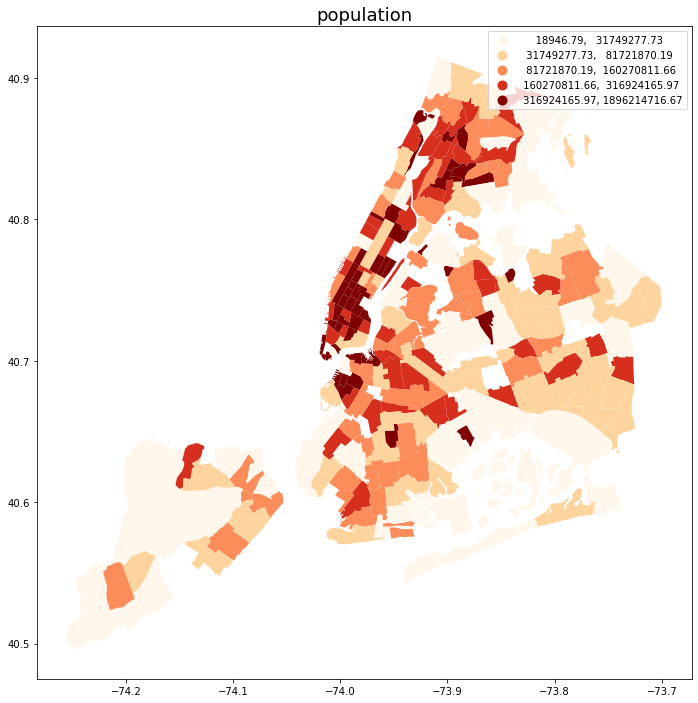

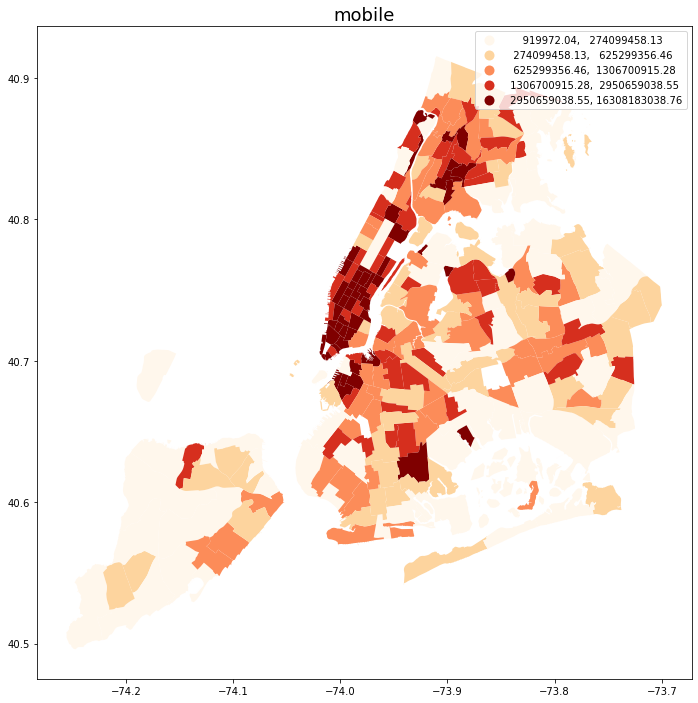

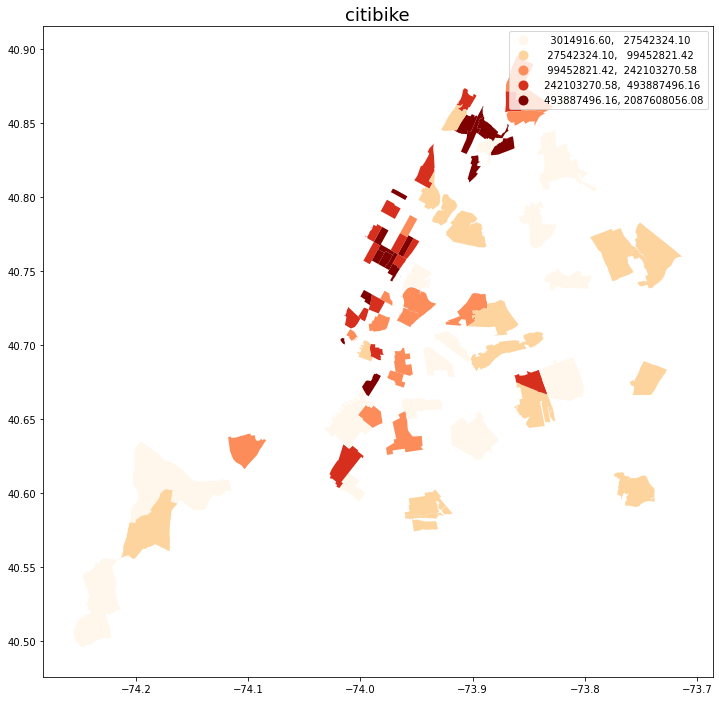

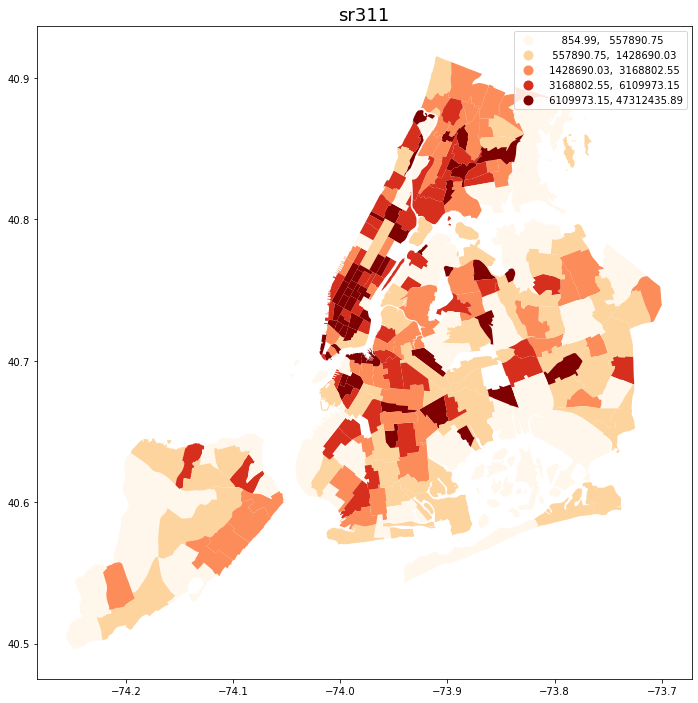

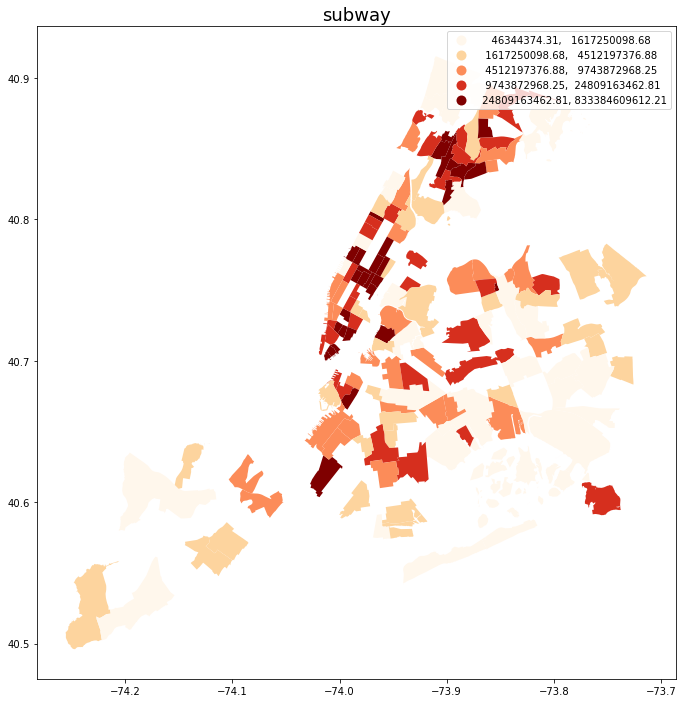

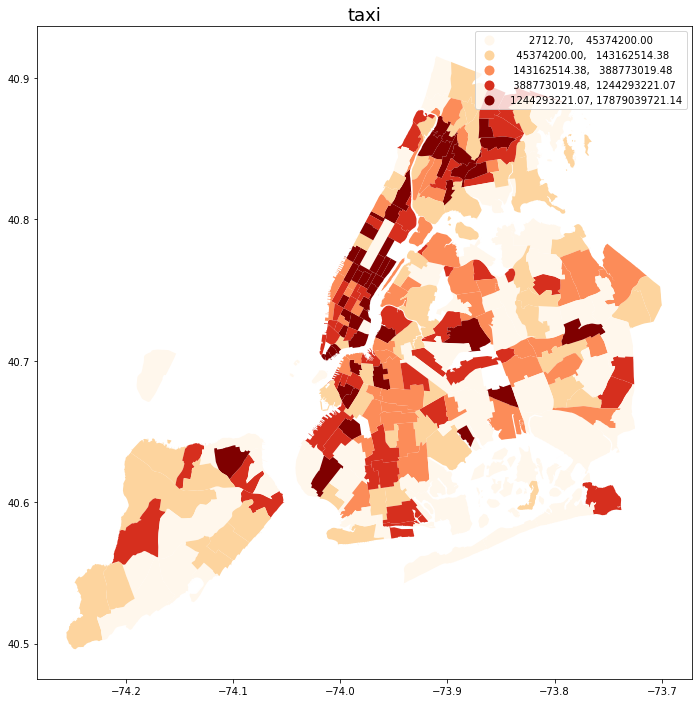

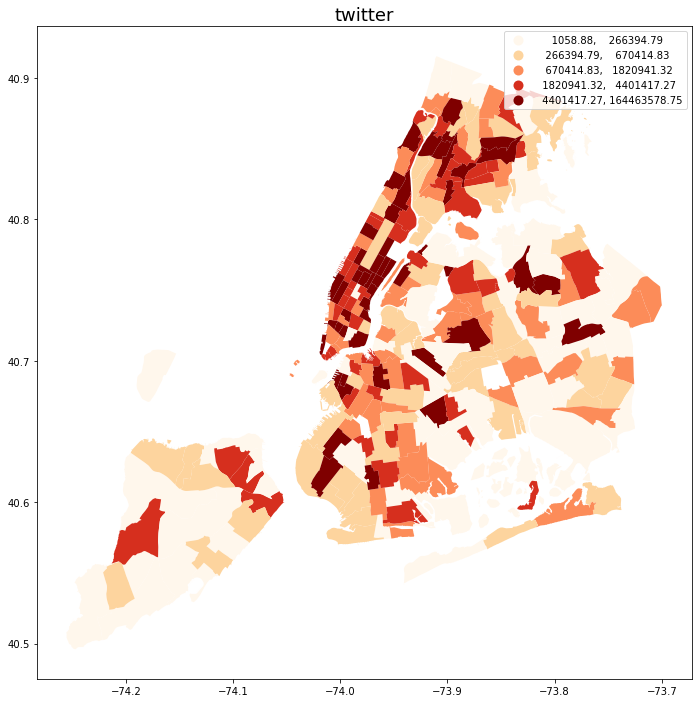

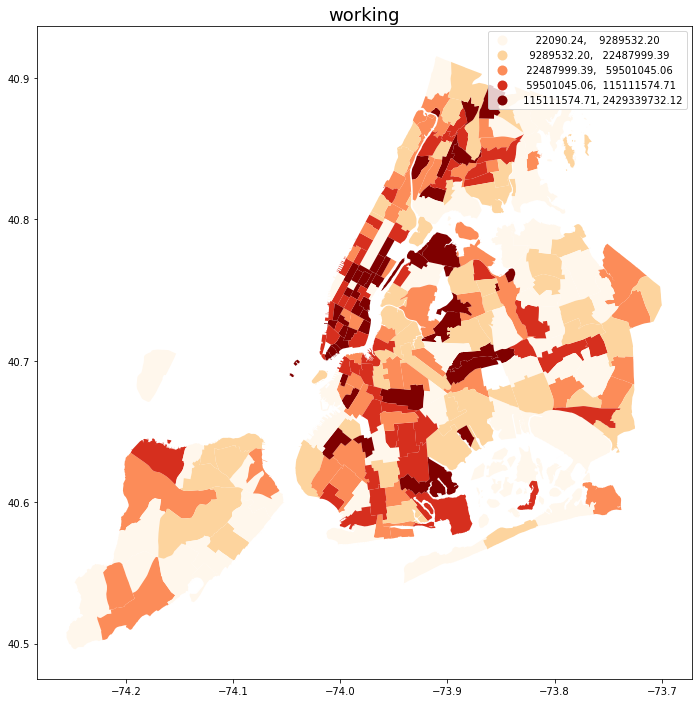

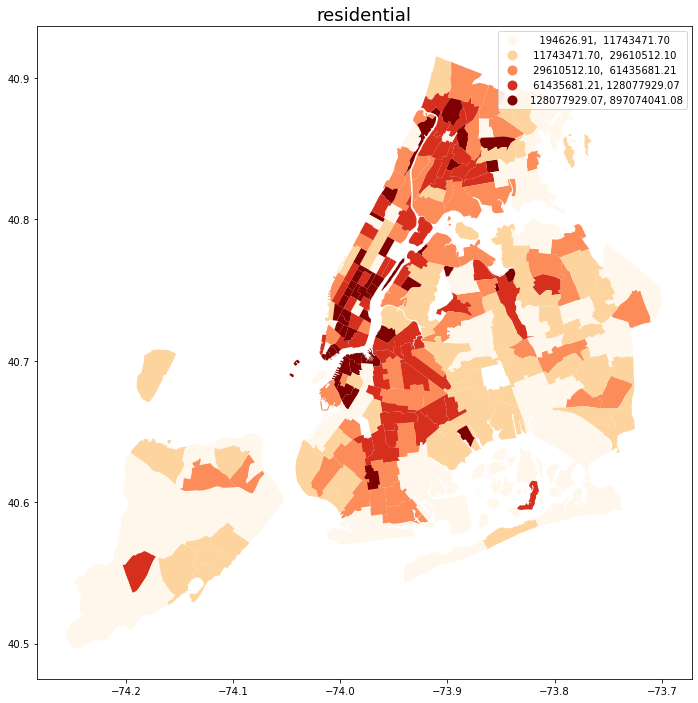

In [98]:
#visualize mobilty heatmaps
for M in ML:
    f, ax = plt.subplots(1, figsize=(12, 12))
    ax.set_title(M, fontsize=18)
    tzs['X']=tzs[M]/tzs.shape_area
    tzs[tzs[M]>0].plot(axes=ax, column='X', scheme='quantiles', legend = True, cmap='OrRd')

In [99]:
#use only taxi, subway and citibike for the clustering analysis
TM=['taxi','subway','citibike']

In [100]:
#normalize the ridership
normRide=tzs[TM].div(tzs[TM].sum(axis=1), axis=0).dropna()

In [101]:
tzs2=tzs.merge(normRide,left_index=True, right_index=True, how='inner', suffixes=['','_norm'])

In [102]:
tzs2.head()

,shape_area,objectid,shape_leng,location_id,zone,borough,geometry,population,mobile,citibike,sr311,subway,taxi,twitter,working,residential,X,taxi_norm,subway_norm,citibike_norm
0,0.000782,1,0.116357453189,1,Newark Airport,EWR,"MULTIPOLYGON (((-74.18445 40.69500, -74.18449 ...",0.0,6348,0,0,0.0,73,44,2717,11398,1.456973e+07,1.000000,0.000000,0.000000
1,0.004866,2,0.43346966679,2,Jamaica Bay,Queens,"MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ...",32450.0,109300,0,700,225527.5,31960,480,1191,12318,2.531266e+06,0.124123,0.875877,0.000000
2,0.000314,3,0.0843411059012,3,Allerton/Pelham Gardens,Bronx,"MULTIPOLYGON (((-73.84793 40.87134, -73.84725 ...",27571.0,179644,31545,399,0.0,178515,85,2495,10751,3.419375e+07,0.849829,0.000000,0.150171
3,0.000112,4,0.0435665270921,4,Alphabet City,Manhattan,"MULTIPOLYGON (((-73.97177 40.72582, -73.97179 ...",26482.0,56271,0,490,0.0,3667,40,17223,6729,6.014913e+07,1.000000,0.000000,0.000000
4,0.000498,5,0.0921464898574,5,Arden Heights,Staten Island,"MULTIPOLYGON (((-74.17422 40.56257, -74.17349 ...",15896.0,147674,0,255,0.0,7456,88,11,43048,8.644915e+07,1.000000,0.000000,0.000000


#### Q1) Cluster the city locations based on taxi/subway/citibike ridership proportion
Use k=4 clusters and the Gausian Mixture algorithm. Visualize the result on the map

In [103]:
tzs2_cluster = tzs2[['taxi_norm', 'subway_norm', 'citibike_norm']]
model = GaussianMixture(n_components=4, random_state=324).fit(tzs2_cluster)
tzs2['label'] = model.predict(tzs2_cluster).astype(str)
tzs2.head()

,shape_area,objectid,shape_leng,location_id,zone,borough,geometry,population,mobile,citibike,...,subway,taxi,twitter,working,residential,X,taxi_norm,subway_norm,citibike_norm,label
0,0.000782,1,0.116357453189,1,Newark Airport,EWR,"MULTIPOLYGON (((-74.18445 40.69500, -74.18449 ...",0.0,6348,0,...,0.0,73,44,2717,11398,1.456973e+07,1.000000,0.000000,0.000000,0
1,0.004866,2,0.43346966679,2,Jamaica Bay,Queens,"MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ...",32450.0,109300,0,...,225527.5,31960,480,1191,12318,2.531266e+06,0.124123,0.875877,0.000000,1
2,0.000314,3,0.0843411059012,3,Allerton/Pelham Gardens,Bronx,"MULTIPOLYGON (((-73.84793 40.87134, -73.84725 ...",27571.0,179644,31545,...,0.0,178515,85,2495,10751,3.419375e+07,0.849829,0.000000,0.150171,3
3,0.000112,4,0.0435665270921,4,Alphabet City,Manhattan,"MULTIPOLYGON (((-73.97177 40.72582, -73.97179 ...",26482.0,56271,0,...,0.0,3667,40,17223,6729,6.014913e+07,1.000000,0.000000,0.000000,0
4,0.000498,5,0.0921464898574,5,Arden Heights,Staten Island,"MULTIPOLYGON (((-74.17422 40.56257, -74.17349 ...",15896.0,147674,0,...,0.0,7456,88,11,43048,8.644915e+07,1.000000,0.000000,0.000000,0


<AxesSubplot:>

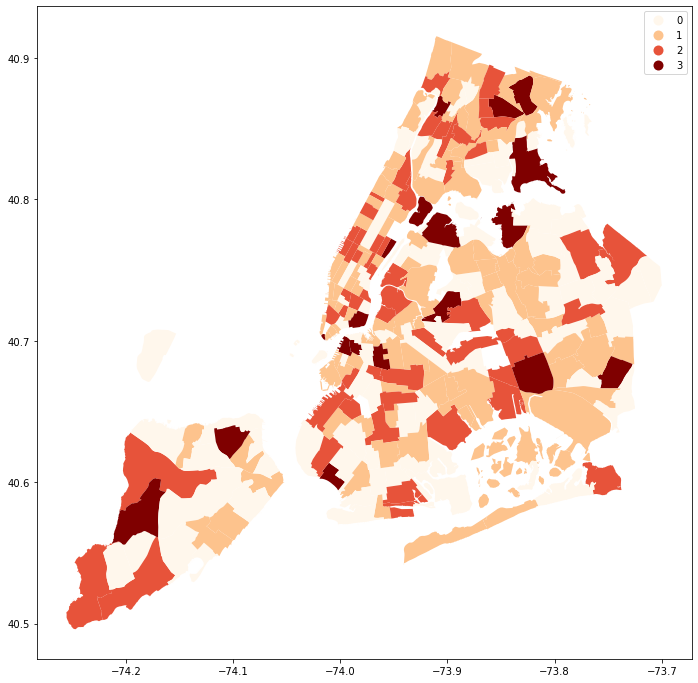

In [104]:
f, ax = plt.subplots(1, figsize=(12, 12))
tzs2.plot(axes=ax, column='label', legend = True, cmap = 'OrRd')

#### Q2). Characterize each cluster with its overall mobility decomposition
Compute total usage of each mobility mode within each cluster, get the percentages by mode within the cluster and visualize the results as a bar plot - one bar per cluster colored by the proportions of each mode trips to the total mobility; same way as for the 311 complaints structure in the lab)

In [105]:
tzs2_cluster = tzs2[['taxi', 'subway', 'citibike']].groupby(tzs2['label']).sum()
tzs2_cluster = tzs2_cluster.div(tzs2_cluster.sum(axis=1), axis=0)
tzs2_cluster.reset_index()

,label,taxi,subway,citibike
0,0,1.000000,0.000000,0.000000
1,1,0.046812,0.952514,0.000674
2,2,0.084959,0.905126,0.009915
3,3,0.854184,0.035777,0.110039


[1. 1. 1. 1.]


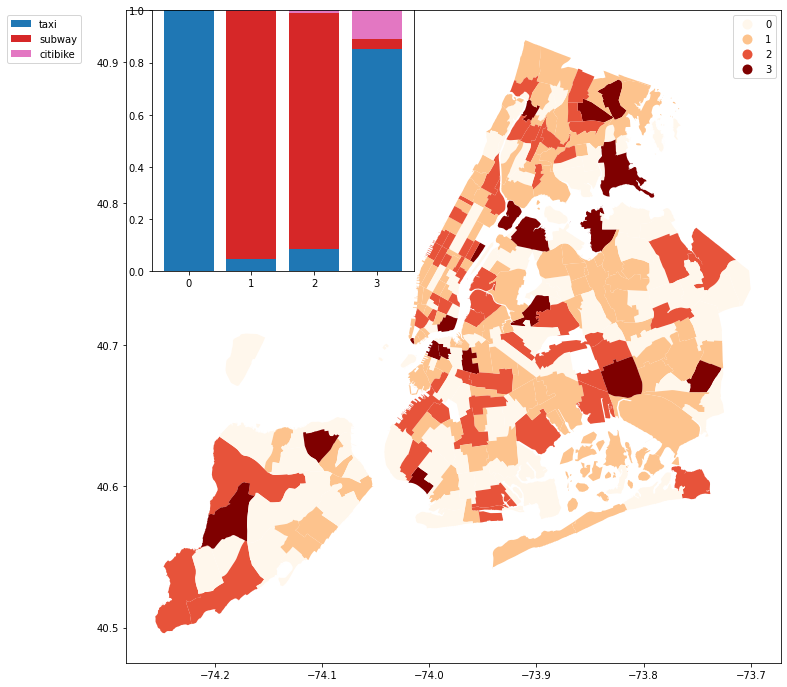

In [106]:
fig, ax = plt.subplots(1, figsize=(12, 12))
tzs2.plot(column='label',cmap='OrRd', legend=True,ax=ax)
ins = ax.inset_axes([0.04,0.6,0.4,0.4])
NUM_COLORS = 4
cm = plt.cm.get_cmap('tab10', NUM_COLORS)
ins.set_prop_cycle(color = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
bot = np.zeros(4)

for col in TM:
    values = tzs2_cluster[col].values
    ins.bar([0,1,2,3], values, bottom = bot, label=col)
    bot = bot + values
print(bot)
ins.set_xticks([0,1,2,3])    
ins.legend(bbox_to_anchor=(-0.25, 1))